# Đồ án cuối kỳ

**Các thành viên:**
1. MSSV: 18120143 - Họ tên: Nguyễn Đình Hoàng Phúc
2. MSSV: 18120512 - Họ tên: Lê Đặng Thiên Phúc

---

## Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## Thu thập dữ liệu

## Khám phá dữ liệu

## Tiền xử lý

## Đưa ra các câu hỏi có ý nghĩa cần trả lời

## Phân tích dữ liệu để trả lời các câu hỏi trên

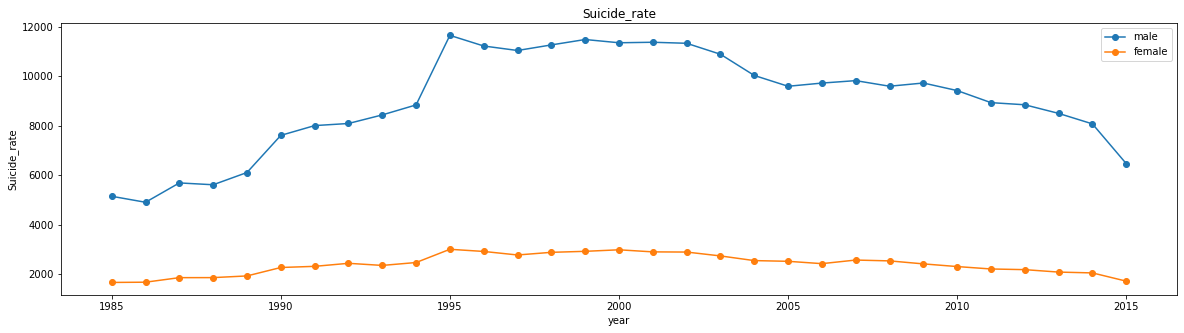

In [36]:
male_df=sex_by_year[sex_by_year['sex']=='male'][['year','Suicide_rate']]
female_df=sex_by_year[sex_by_year['sex']=='female'][['year','Suicide_rate']]

fig, ax = plt.subplots(figsize=(20, 5))


ax.plot(male_df['year'],male_df['Suicide_rate'],marker='o')
ax.plot(female_df['year'],female_df['Suicide_rate'],marker='o')

ax.set(title = "Suicide_rate",
       xlabel = "year",
       ylabel = "Suicide_rate")
plt.legend(['male','female'])
plt.show()

=> thấy một sự tăng cao bất thường về tỷ lệ tự tử của nam và nữ trên 100k dân số vào năm 1995.

In [37]:
#tính tỷ lệ số ca tự tử trên 100k dân số giữa 2 giới tính theo từng năm.
male_df=male_df.set_index('year')
female_df=female_df.set_index('year')
index_max=male_df/female_df
index_max.sort_values('Suicide_rate',ascending=False).head(10)

,Suicide_rate
year,
2010,4.085919
2013,4.081129
2012,4.056559
2011,4.045729
2009,4.029311
2006,4.012608
1997,3.980852
2003,3.980786
2014,3.940765


#### Xem thử tỷ lệ tự tự giữa nam và nữa khác nhau giữa các quốc gia như thế 

In [38]:
# tính toán tỷ lệ tự tử của các quốc gia trên 100k dân
sex_by_country = suicide_df.groupby(['country', 'sex']).agg({'suicides/100k pop': ['sum']})
sex_by_country.columns = ['Suicide_rate']
sex_by_country.reset_index(inplace=True)
sex_by_country=sex_by_country.sort_values('Suicide_rate',ascending=False)


male_df=sex_by_country[sex_by_country['sex']=='male'][['country','Suicide_rate']]
female_df=sex_by_country[sex_by_country['sex']=='female'][['country','Suicide_rate']]

male_df=male_df.set_index('country')
female_df=female_df.set_index('country')
index=male_df/female_df

In [39]:
# tính top10 cao nhât 
index.sort_values('Suicide_rate',ascending=False).head(10)

,Suicide_rate
country,
Saint Vincent and Grenadines,15.031848
Seychelles,14.149555
Antigua and Barbuda,10.468630
Puerto Rico,10.024001
Belize,7.549044
Costa Rica,7.234884
Mexico,6.577301
Grenada,6.553422
Chile,6.384413


In [40]:
#top10 thấp nhất
index.sort_values('Suicide_rate',ascending=False).tail(10)

,Suicide_rate
country,
Sweden,2.666906
Azerbaijan,2.622166
Montenegro,2.537447
Republic of Korea,2.393833
Netherlands,2.299767
Japan,2.151054
Albania,1.899116
Singapore,1.690847
Kuwait,1.302860


#### Tính theo từng độ tuổi

In [41]:
# Tính tỷ lệ tự tử phân theo độ tuổi và giới tính
sex_by_age = suicide_df.groupby(['age', 'sex']).agg({'suicides_no': ['sum']})
sex_by_age.columns = ['Total suicides']
sex_by_age.reset_index(inplace=True)
sex_by_age.head(5)

,age,sex,Total suicides
0,15-24 years,female,174928
1,15-24 years,male,631591
2,25-34 years,female,208312
3,25-34 years,male,912674
4,35-54 years,female,504875


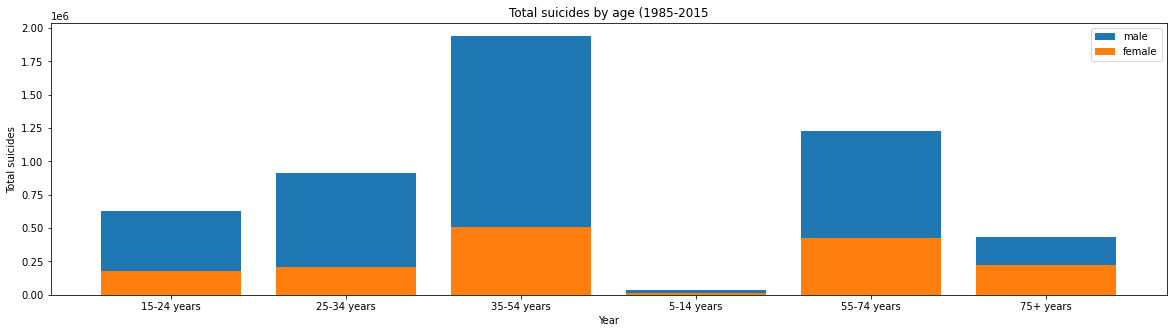

In [42]:
# tỷ lệ tự tử phân theo giới
male_df=sex_by_age[sex_by_age['sex']=='male'][['age','Total suicides']]
female_df=sex_by_age[sex_by_age['sex']=='female'][['age','Total suicides']]

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(male_df['age'],male_df['Total suicides'])
ax.bar(female_df['age'],female_df['Total suicides'])

ax.set(title = "Total suicides by age (1985-2015",
       xlabel = "Year",
       ylabel = "Total suicides")
plt.legend(['male','female'])
plt.show()


In [43]:
#tỷ lệ giới tính tự tử theo từng đọ tuổi là bao nhiêu.
male_df=male_df.set_index('age')
female_df=female_df.set_index('age')
index=male_df/female_df
index.sort_values('Total suicides',ascending=False)

,Total suicides
age,
25-34 years,4.381284
35-54 years,3.843797
15-24 years,3.610577
55-74 years,2.855360
5-14 years,2.079438
75+ years,1.940814


Nhận xét: Tính theo tổng số ca thì lứa tuổi 35-54, dù là nam hay nữ đều có xu hướng tự tử nhiều nhất.

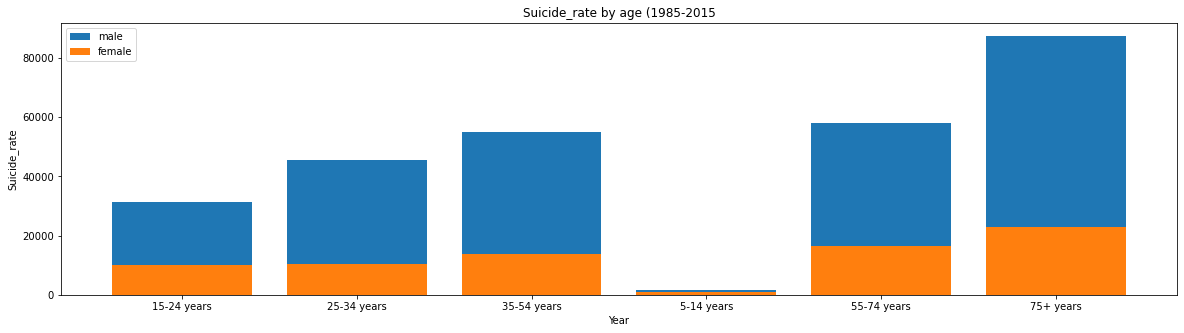

In [44]:
#tính tỷ lệ tự tử trên 100k 
sex_by_age = suicide_df.groupby(['age', 'sex']).agg({'suicides/100k pop': ['sum']})
sex_by_age.columns = ['Suicide_rate']
sex_by_age.reset_index(inplace=True)

male_df=sex_by_age[sex_by_age['sex']=='male'][['age','Suicide_rate']]
female_df=sex_by_age[sex_by_age['sex']=='female'][['age','Suicide_rate']]


fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(male_df['age'],male_df['Suicide_rate'])
ax.bar(female_df['age'],female_df['Suicide_rate'])

ax.set(title = "Suicide_rate by age (1985-2015",
       xlabel = "Year",
       ylabel = "Suicide_rate")
plt.legend(['male','female'])

plt.show()

In [45]:
#tỷ lệ giới tính tự tử theo từng đọ tuổi là bao nhiêu.
male_df=male_df.set_index('age')
female_df=female_df.set_index('age')
index=male_df/female_df
index.sort_values('Suicide_rate',ascending=False)

,Suicide_rate
age,
25-34 years,4.322812
35-54 years,4.047601
75+ years,3.825505
55-74 years,3.530721
15-24 years,3.133318
5-14 years,1.687563


Nhận xét: Tính theo tỷ lệ tự tử trên 100k dân thì ở lứa tuổi 75 , cả hai giới đều có tỷ lệ tự tử lớn nhất.

#### Kết luận: Nam có xu hướng tự tử ( thành công) nhiều hơn nữ từ 3-4 lần.

-Trong thực tế thì nữ lại có xu hướng tự tử nhiều hơn nam(1,2 lần). Nhưng nam lại có cách thức tự tử bạo lực hơn nên đa phần hoàn thành trước khi người ta kịp giải cứu. Bằng chứng là ở mỹ (6/10 khẩu súng được sở hữu bởi nam, và tự tử bằng súng chiếm 1/2 số ca tự tử ở nam).<sup>(2)(3)</sup>
       
-Theo lứa tuổi, hiện nay tổng số ca tự tự ở tuổi 35-54 là lớn nhất và có xu hướng ngày càng tăng do áp lực cuộc sống... Tỷ lệ tự tử ở người già 75+ đang là cao nhất vì thiếu sự quan tâm chăm sóc của con cháu ( ở nhiều nước phát triển) và sự cô đơn tuổi già.

## Nhìn lại quá trình làm đồ án

### Thành viên: Nguyễn Đình Hoàng Phúc

### Thành viên: Lê Đặng Thiên Phúc

## Tài liệu tham khảo